## Unsupervised learning

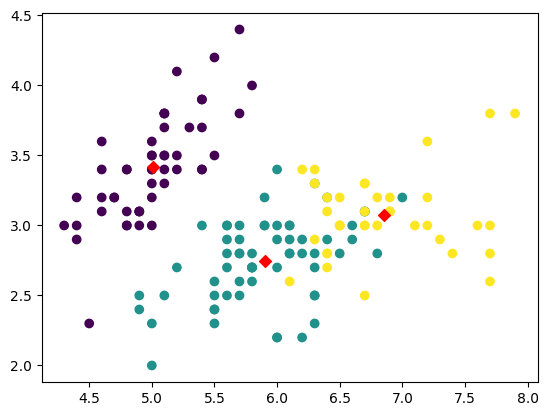

In [20]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
model = KMeans(n_clusters = 3)
data = pd.read_csv("iris.csv",sep=",",names = ['sepal_length', 'sepal_width','petal_length', 'petal_width', 'class'])
data.head()
data_sample = data.drop(["class"],axis =1 )
data_sample.head()
model.fit(data_sample)
labels = model.predict(data_sample)
xs = np.array(data_sample)[:,0]
ys = np.array(data_sample)[:,1]
plt.scatter(xs,ys,c = labels)
centroids = model.cluster_centers_
centroidx = centroids[:,0]
centroidy = centroids[:,1]
plt.scatter(centroidx,centroidy,marker = "D",c="red")
plt.show()

## Mesuring clustering quality

In [ ]:
#construct a cross tabulation
#lower vale of inertia are better
#pd.crosstab(df["labels"],df["varieties"])

In [21]:
#Standard scaler hor having the same influence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_sample)
StandardScaler(copy=True,with_mean = True,with_std =True)
sample_scaled = scaler.transform(data_sample)


First you standardize the data and secondly you use k_means. So we have a pipeline

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(scaler,kmeans)
pipeline.fit(data_sample)
lables = pipeline.predict(data_sample)


# Visualizing hierarkies

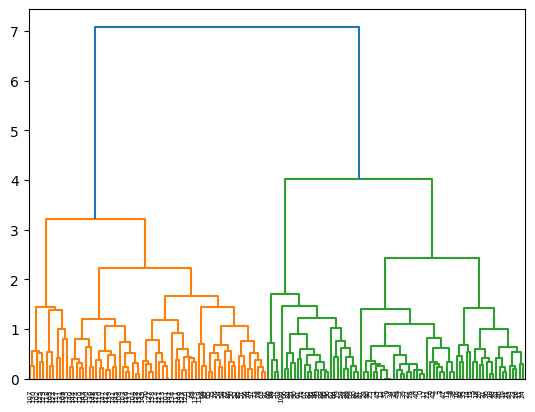

In [27]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
mergings = linkage(data_sample,method="complete")
dendrogram(mergings)
plt.show()

In [29]:
#the hight is the distance between clusters. Used by linkage methods =complete
from scipy.cluster.hierarchy import fcluster
labels = fcluster(mergings,15,criterion = "distance")
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
